<a href="https://colab.research.google.com/github/Lekhya-Thota/vision_project/blob/main/Real_Time_Vehicle_Detection_using_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required libraries
!pip install ultralytics
!pip install roboflow
!pip install opencv-python-headless
!pip install matplotlib
!pip install ffmpeg-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 108.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [2]:
from google.colab import files
uploaded = files.upload()


Saving Vehicles-OpenImages.v1-416x416.yolov8.zip to Vehicles-OpenImages.v1-416x416.yolov8 (1).zip


In [3]:
import zipfile
import os

zip_path = "/content/Vehicles-OpenImages.v1-416x416.yolov8.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("dataset")  # extracts to folder "dataset"

# Check folder structure
os.listdir("dataset")


['valid',
 'train',
 'README.roboflow.txt',
 'test',
 'README.dataset.txt',
 'data.yaml']

In [8]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

model.train(
    data="dataset/data.yaml",
    epochs=25,
    imgsz=320,
    batch=16,
    workers=2,
    cache=True,
    project="YOLO-Vehicle-Detection",
    name="vehicles_model",
    exist_ok=True
)


Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=vehicles_model, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0,

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d4ccf2da6c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [11]:
!ls


 dataset
 sample_data
'Vehicles-OpenImages.v1-416x416.yolov8 (1).zip'
 Vehicles-OpenImages.v1-416x416.yolov8.zip
 yolov8n.pt
 YOLO-Vehicle-Detection


In [12]:
!ls YOLO-Vehicle-Detection


vehicles_model


In [13]:
!ls YOLO-Vehicle-Detection/vehicles_model


args.yaml			 results.csv	     val_batch0_labels.jpg
BoxF1_curve.png			 results.png	     val_batch0_pred.jpg
BoxP_curve.png			 train_batch0.jpg    val_batch1_labels.jpg
BoxPR_curve.png			 train_batch1.jpg    val_batch1_pred.jpg
BoxR_curve.png			 train_batch2.jpg    val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch825.jpg  val_batch2_pred.jpg
confusion_matrix.png		 train_batch826.jpg  weights
labels.jpg			 train_batch827.jpg


In [14]:
!ls YOLO-Vehicle-Detection/vehicles_model/weights


best.pt  last.pt



image 1/1 /content/dataset/test/images/1ef77c61856d3b4b_jpg.rf.HZMSiUVx3WUcMIooJMZX.jpg: 320x320 1 Motorcycle, 62.1ms
Speed: 1.1ms preprocess, 62.1ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 320)
Results saved to /content/runs/detect/predict2


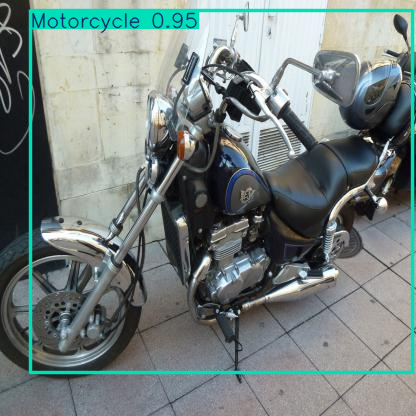

In [23]:
from ultralytics import YOLO

model = YOLO("YOLO-Vehicle-Detection/vehicles_model/weights/best.pt")

test_img = "dataset/test/images/1ef77c61856d3b4b_jpg.rf.HZMSiUVx3WUcMIooJMZX.jpg"
results = model.predict(test_img, save=True)
results[0].show()


In [25]:
!find . -name best.pt


./YOLO-Vehicle-Detection/vehicles_model/weights/best.pt


In [26]:
from ultralytics import YOLO

model = YOLO("./YOLO-Vehicle-Detection/vehicles_model/weights/best.pt")


In [27]:
!ls dataset/test/images | head


00dea1edf14f09ab_jpg.rf.3f17c8790a68659d03b1939a59ccda80.jpg
00dea1edf14f09ab_jpg.rf.KJ730oDTFPdXdJxvSLnX.jpg
00e481ea1a520175_jpg.rf.6e6a8b3b45c9a11d106958f88ff714ea.jpg
00e481ea1a520175_jpg.rf.MV6sZ8QCFwFeMYaI2tHm.jpg
08c8b73e0c2e296e_jpg.rf.7IkYAamjZhnwsoXSrwKt.jpg
08c8b73e0c2e296e_jpg.rf.effa65856584463c08848031cab357b9.jpg
10c26c6598677a1f_jpg.rf.f72b2b91e750909f68fffeee777e9350.jpg
10c26c6598677a1f_jpg.rf.USCbBYVcUICkLhuq07Lw.jpg
1ef77c61856d3b4b_jpg.rf.a528f50763101224fad39907062c5026.jpg
1ef77c61856d3b4b_jpg.rf.HZMSiUVx3WUcMIooJMZX.jpg


In [28]:
test_img = "dataset/test/images/1ef77c61856d3b4b_jpg.rf.HZMSiUVx3WUcMIooJMZX.jpg"

results = model.predict(test_img, save=True)



image 1/1 /content/dataset/test/images/1ef77c61856d3b4b_jpg.rf.HZMSiUVx3WUcMIooJMZX.jpg: 320x320 1 Motorcycle, 63.2ms
Speed: 1.7ms preprocess, 63.2ms inference, 0.9ms postprocess per image at shape (1, 3, 320, 320)
Results saved to /content/runs/detect/predict3


In [29]:
model.predict(
    source="dataset/test/images",
    save=True,
    conf=0.25
)



image 1/126 /content/dataset/test/images/00dea1edf14f09ab_jpg.rf.3f17c8790a68659d03b1939a59ccda80.jpg: 320x320 1 Ambulance, 65.5ms
image 2/126 /content/dataset/test/images/00dea1edf14f09ab_jpg.rf.KJ730oDTFPdXdJxvSLnX.jpg: 320x320 1 Ambulance, 60.1ms
image 3/126 /content/dataset/test/images/00e481ea1a520175_jpg.rf.6e6a8b3b45c9a11d106958f88ff714ea.jpg: 320x320 3 Buss, 60.5ms
image 4/126 /content/dataset/test/images/00e481ea1a520175_jpg.rf.MV6sZ8QCFwFeMYaI2tHm.jpg: 320x320 3 Buss, 59.2ms
image 5/126 /content/dataset/test/images/08c8b73e0c2e296e_jpg.rf.7IkYAamjZhnwsoXSrwKt.jpg: 320x320 2 Buss, 63.0ms
image 6/126 /content/dataset/test/images/08c8b73e0c2e296e_jpg.rf.effa65856584463c08848031cab357b9.jpg: 320x320 2 Buss, 57.4ms
image 7/126 /content/dataset/test/images/10c26c6598677a1f_jpg.rf.USCbBYVcUICkLhuq07Lw.jpg: 320x320 1 Motorcycle, 58.9ms
image 8/126 /content/dataset/test/images/10c26c6598677a1f_jpg.rf.f72b2b91e750909f68fffeee777e9350.jpg: 320x320 1 Motorcycle, 57.9ms
image 9/126 /cont

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Ambulance', 1: 'Bus', 2: 'Car', 3: 'Motorcycle', 4: 'Truck'}
 obb: None
 orig_img: array([[[159, 164, 143],
         [207, 212, 191],
         [122, 124, 105],
         ...,
         [252, 250, 249],
         [254, 252, 251],
         [255, 253, 252]],
 
        [[141, 146, 125],
         [147, 152, 131],
         [189, 191, 171],
         ...,
         [252, 250, 249],
         [254, 252, 251],
         [255, 253, 252]],
 
        [[153, 159, 136],
         [158, 164, 141],
         [152, 155, 133],
         ...,
         [253, 251, 250],
         [254, 252, 251],
         [255, 253, 252]],
 
        ...,
 
        [[128, 123, 122],
         [123, 118, 117],
         [117, 113, 112],
         ...,
         [ 80,  87, 104],
         [ 81,  88, 105],
         [ 87,  94, 111]],
 
        [[125, 120, 119],
         [118, 113, 112],
      

In [30]:
model.val(
    data="dataset/data.yaml",
    imgsz=320,
    batch=16
)


Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 239.4±148.7 MB/s, size: 26.9 KB)
val: Scanning /content/dataset/valid/labels.cache... 250 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 250/250 115.6Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 16/16 1.2s/it 18.9s
                   all        250        454      0.619      0.583      0.601      0.463
             Ambulance         50         64      0.685       0.75      0.835      0.731
                   Bus         30         46      0.664      0.696       0.69       0.57
                   Car         90        238      0.631      0.475      0.517      0.356
            Motorcycle         42         46      0.617      0.629      0.583      0.374
                 Truck         38         60      0.496      0.367      0.379      0.281
Speed: 0.6ms preprocess, 68.0ms infere

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d4ca1a868a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [32]:
model.val(
    data="dataset/data.yaml",
    imgsz=320,
    batch=16
)


Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 825.7±396.6 MB/s, size: 29.4 KB)
val: Scanning /content/dataset/valid/labels.cache... 250 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 250/250 368.4Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 16/16 1.1s/it 18.0s
                   all        250        454      0.619      0.583      0.601      0.463
             Ambulance         50         64      0.685       0.75      0.835      0.731
                   Bus         30         46      0.664      0.696       0.69       0.57
                   Car         90        238      0.631      0.475      0.517      0.356
            Motorcycle         42         46      0.617      0.629      0.583      0.374
                 Truck         38         60      0.496      0.367      0.379      0.281
Speed: 0.5ms preprocess, 65.0ms infere

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d4cb5d6a5d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [41]:
from ultralytics import YOLO

model = YOLO("YOLO-Vehicle-Detection/vehicles_model/weights/best.pt")


In [7]:
results = model.predict(
    source="/input_video1.mp4",
    imgsz=320,
    conf=0.4,
    save=True
)


NameError: name 'model' is not defined

In [1]:
!ls


 dataset      'Vehicles-OpenImages.v1-416x416.yolov8 (1).zip'
 frames        Vehicles-OpenImages.v1-416x416.yolov8.zip
 runs	       yolov8n.pt
 sample_data   YOLO-Vehicle-Detection


In [2]:
!mkdir frames


mkdir: cannot create directory ‘frames’: File exists


In [3]:
!ffmpeg -i /input_video1.mp4 -vf fps=5 frames/frame_%04d.jpg


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [4]:
from IPython.display import Video
Video("runs/detect/predict4/input_video1.mp4", embed=True)


In [5]:
!ffmpeg -i /input_video1.mp4 frames/frame_%04d.jpg


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab